In [3]:
#%matplotlib notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2
import scipy.optimize


import os
import os.path as path
import wget

In [4]:
if not path.exists('Data'):
    os.mkdir('Data')

file='Data/Minimos.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosLineal.txt'

if not path.exists(file):
    Path_ = wget.download(url, file)
else:
    Path_ = file

In [5]:
data = np.loadtxt(Path_)
x = data[:,0]
y = data[:,1]
N = len(x)
sigma = np.random.uniform(0,0.2,N)
sigma
print(N)

20


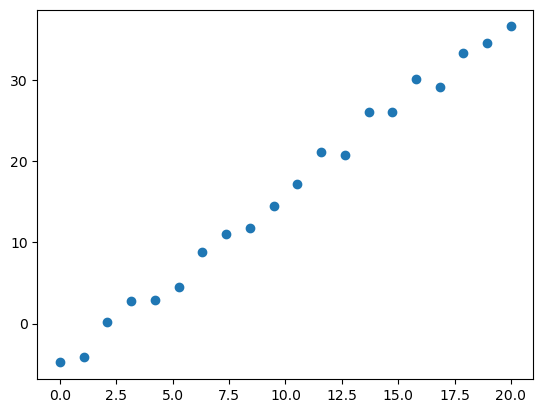

In [6]:
plt.scatter(x,y)

In [7]:
def GetFit(x,y,n=2):
    
    l = x.shape[0]
    b = y
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)
    xsol = np.linalg.solve(AT,bT)
    
    return xsol

In [8]:
n = 1
param = GetFit(x,y,n)
param

array([-5.12918553,  2.12503681])

In [9]:
def GetModel(x,p):
    y = 0
    for n in range(len(p)):
        y += p[n]*x**n
    return y

In [10]:
X = sym.Symbol('x',real=True)
GetModel(X,param)

2.12503680800827*x - 5.12918552885299

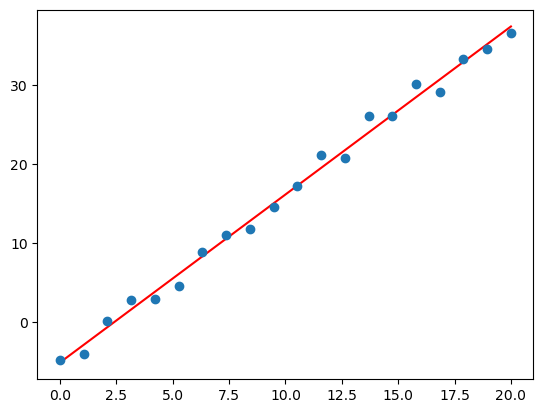

In [11]:
_x = np.linspace(np.min(x),np.max(x),50)
_y = GetModel(_x,param)

plt.errorbar(x,y,yerr=sigma,fmt='o')
plt.plot(_x,_y,color='r')

## Varianza

In [12]:
def GetError(x,y,p):
    l = x.shape[0]
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
    
    # Residuos
    R = y - np.dot(A,p)
    sigma2 = np.dot( R.T, R )/(N-len(p))
    
    print(sigma2)
    CVar = sigma2*np.linalg.inv(np.dot(A.T,A))
    
    return CVar

In [13]:
Cov = GetError(x,y,param)

1.2705875359223997


In [14]:
Cov

array([[ 0.23596625, -0.01724369],
       [-0.01724369,  0.00172437]])

In [15]:
std = np.sqrt(np.diag(Cov))